<a href="https://colab.research.google.com/github/kaveti27022001/ACM-ICPC-Algorithms/blob/master/Kaveti_Chinmai_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

df['cleaned'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip uninstall -y gensim numpy


Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install numpy==1.24.4


In [ ]:
!pip install gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [ ]:
from sklearn.datasets import fetch_20newsgroups
import random
import pandas as pd
import numpy as np
# Load full dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Sample 2000 random posts
random.seed(42)
indices = random.sample(range(len(data.data)), 2000)
sampled_data = [data.data[i] for i in indices]
df = pd.DataFrame(sampled_data, columns=["text"])

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

df['cleaned'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import gensim
import numpy as np

# Tokenized docs
tokenized_docs = [doc.split() for doc in df['cleaned']]

# Create Dictionary and Corpus
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# Create TF and TF-IDF matrices
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
tf = vectorizer.fit_transform(df['cleaned'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(df['cleaned'])

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(tf)

# LSA
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa.fit_transform(tfidf)


In [ ]:
def compute_coherence_values(model_type, texts, dictionary, corpus, start=2, limit=15, step=1):
    coherence_scores = []
    for k in range(start, limit, step):
        if model_type == 'lda':
            model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
        elif model_type == 'lsa':
            model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=k)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((k, coherencemodel.get_coherence()))
    return coherence_scores

lda_coherence = compute_coherence_values('lda', tokenized_docs, dictionary, corpus)
lsa_coherence = compute_coherence_values('lsa', tokenized_docs, dictionary, corpus)


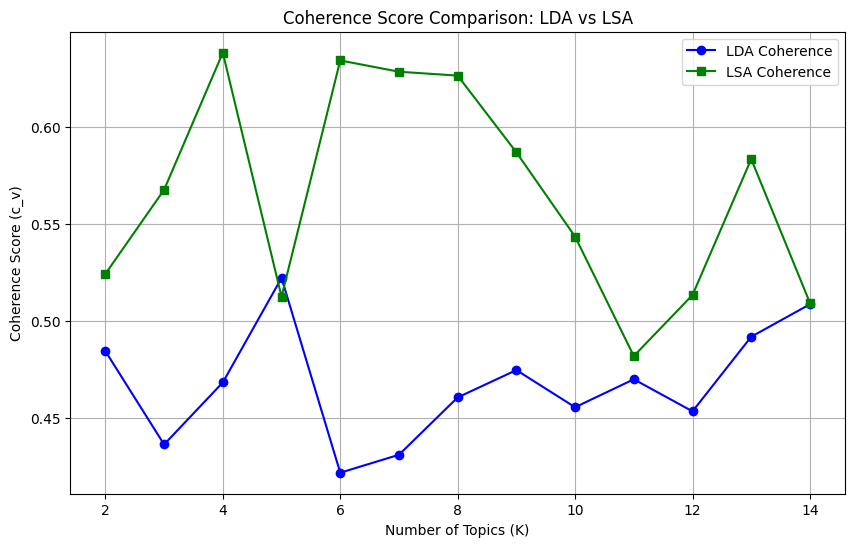

In [ ]:
import matplotlib.pyplot as plt

# Unpack the scores
lda_k, lda_scores = zip(*lda_coherence)
lsa_k, lsa_scores = zip(*lsa_coherence)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lda_k, lda_scores, marker='o', label='LDA Coherence', color='blue')
plt.plot(lsa_k, lsa_scores, marker='s', label='LSA Coherence', color='green')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score (c_v)")
plt.title("Coherence Score Comparison: LDA vs LSA")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

topics = best_lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")


Topic 1: 0.005*"would" + 0.004*"also" + 0.004*"game" + 0.004*"like" + 0.004*"year" + 0.003*"problem" + 0.003*"entry" + 0.003*"drive" + 0.003*"good" + 0.003*"time"
Topic 2: 0.010*"would" + 0.006*"people" + 0.005*"know" + 0.005*"think" + 0.004*"time" + 0.004*"like" + 0.004*"right" + 0.004*"also" + 0.004*"thing" + 0.003*"government"
Topic 3: 0.006*"stephanopoulos" + 0.005*"myers" + 0.004*"gopher" + 0.003*"president" + 0.003*"search" + 0.002*"going" + 0.002*"think" + 0.002*"know" + 0.002*"package" + 0.002*"remote"
Topic 4: 0.004*"said" + 0.004*"know" + 0.004*"like" + 0.003*"would" + 0.003*"people" + 0.003*"could" + 0.003*"time" + 0.003*"say" + 0.002*"anyone" + 0.002*"year"
Topic 5: 0.008*"file" + 0.004*"available" + 0.004*"window" + 0.004*"server" + 0.004*"data" + 0.004*"system" + 0.003*"also" + 0.003*"image" + 0.003*"version" + 0.003*"program"


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [3]:
!pip install 'numpy>=1.24'
!pip install --upgrade jax bertopic

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.


In [4]:
!pip install --upgrade numpy --quiet
!pip uninstall -y bertopic
!pip install bertopic[all] --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, 

In [1]:
!pip install --upgrade numpy --quiet
!pip uninstall -y bertopic
!pip install bertopic[all] --quiet
!pip install --upgrade numpy --quiet
!pip uninstall -y umap-learn pynndescent
!pip install umap-learn[plot] pynndescent --no-cache-dir --quiet
!pip install --upgrade numpy --quiet
!pip uninstall -y pynndescent numpy
!pip install numpy==1.22.4
!pip install pynndescent


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, 

  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
ERROR: Operation cancelled by user
^C


RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

ImportError: Matplotlib requires numpy>=1.23; you have 1.22.4

In [1]:
!pip install numpy==1.24.4 # Install a compatible numpy version
!pip install --upgrade pandas # Reinstall/upgrade pandas with compatible numpy version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 121.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The issue is related to compatibility with jax, tensorflow, and transformers
# A combination of downgrading jax and ensuring appropriate transformers version often helps resolve this issue
!pip install jax[cpu]==0.4.13  # Downgrade jax to a compatible version
!pip install --upgrade transformers  # Update transformers for compatibility
!pip install --upgrade bertopic[all]  # Update bertopic[all]
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary


k = 10
# Make sure the path to your CSV file is correct
df = pd.read_csv('/content/sample_data/Narrators_data_Cleaned.csv', usecols=['Processed_details'])
# Access the 'Processed_Details' column using the correct name
details = df['Processed_details'].to_list()
df.head()

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 420, in discover_pjrt_plugins
    plugin_module = importlib.import_module(plugin_module_name)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_r

,Processed_details
0,nisei femal born may selleck washington spent ...
1,nisei male born june seattl washington grew ar...
2,nisei femal born octob seattl washington famil...
3,nisei femal born juli boyl height california a...
4,sansei male born march torranc california grew...


In [2]:
Berttopic_model = BERTopic(nr_topics=k)

In [3]:
topics, probabilities = Berttopic_model.fit_transform(details)

In [4]:
Berttopic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,410,0_washington_nisei_born_assembl,"[washington, nisei, born, assembl, oregon, cen...",[nisei male born septemb seattl washington spe...
1,1,164,1_serv_dure_war_ii,"[serv, dure, war, ii, world, intellig, militar...",[nisei male born juli dure world war ii serv m...
2,2,123,2_pearl_bomb_california_juli,"[pearl, bomb, california, juli, famili, went, ...",[nisei male born juli lindsay california follo...
3,3,82,3_seattl_white_district_reverend,"[seattl, white, district, reverend, novemb, mo...",[white male born novemb seattl washington son ...
4,4,41,4_success_prior_own_oper,"[success, prior, own, oper, store, octob, groc...",[nisei femal born octob seattl washington fami...
5,5,41,5_angel_lo_activ_sold,"[angel, lo, activ, sold, march, koyasan, insur...",[sansei male born march torranc california gre...
6,6,41,6_elain_kim_fujii_arlen,"[elain, kim, fujii, arlen, ann, akagi, yoshito...",[in session elain kim led panel elain reiko ak...
7,7,41,7_british_canada_suquamish_squamish,"[british, canada, suquamish, squamish, reserv,...",[femal suquamish filipino descent born januari...
8,8,41,8_colorado_left_francisco_briefli,"[colorado, left, francisco, briefli, amach, gr...",[sansei femal born octob san francisco califor...
9,9,41,9_saratoga_larg_garden_estat,"[saratoga, larg, garden, estat, work, juli, af...",[nisei male born juli saratoga california grew...


In [5]:
Berttopic_model.visualize_barchart(top_n_topics=10, n_words = 40, width = 300, height = 300)

In [6]:
Berttopic_model.visualize_hierarchy(top_n_topics=10, width = 700, height = 700)

In [7]:
pip install gensim

In [1]:
!pip install --upgrade h5py

In [1]:
!pip install --upgrade jax jaxlib

  Using cached jax-0.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.3-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached jax-0.5.3-py3-none-any.whl (2.4 MB)
Using cached jaxlib-0.5.3-cp311-cp311-manylinux2014_x86_64.whl (105.1 MB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.13
    Uninstalling jaxlib-0.4.13:
      Successfully uninstalled jaxlib-0.4.13
  Attempting uninstall: jax
    Found existing installation: jax 0.4.13
    Uninstalling jax-0.4.13:
      Successfully uninstalled jax-0.4.13
ERROR: pip's dependency resolver does not currently take into account all the packages th

In [2]:
!pip install numpy==1.24.4 # Install a compatible numpy version
 # Reinstall/upgrade gensim with compatible numpy version

In [1]:
!pip install --upgrade gensim

In [3]:
!pip install numpy==1.24.4 # Install a compatible numpy version


In [1]:
 # Install a compatible numpy version
!pip install --upgrade jax jaxlib # Upgrade jax and jaxlib for compatibility
#!pip install --upgrade bertopic[all] # Update bertopic[all] for compatibility with latest jax and numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible

In [1]:
#!pip install numpy==1.24.4 # Install a compatible numpy version
#!pip install --upgrade jax jaxlib # Upgrade jax and jaxlib for compatibility
!pip install --upgrade bertopic[all] # Update bertopic[all] for compatibility with latest jax and numpy

  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.


In [2]:
!pip install numpy==1.24.4 # Install a compatible numpy version
#!pip install --upgrade gensim # Reinstall/upgrade gensim with compatible numpy version

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
pymc 5.21.

In [1]:
!pip install --upgrade gensim

In [1]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from bertopic import BERTopic

In [2]:
import pandas as pd
k = 10
# Make sure the path to your CSV file is correct
df = pd.read_csv('/content/sample_data/Narrators_data_Cleaned.csv', usecols=['Processed_details'])
# Access the 'Processed_Details' column using the correct name
details = df['Processed_details'].to_list()  # Define details here
df.head()

,Processed_details
0,nisei femal born may selleck washington spent ...
1,nisei male born june seattl washington grew ar...
2,nisei femal born octob seattl washington famil...
3,nisei femal born juli boyl height california a...
4,sansei male born march torranc california grew...


In [3]:

#from gensim.corpora import Dictionaryfrom bertopic import BERTopic # Ensure Dictionary is imported in this cell
def calculate_coherence_score(docs, min_topics=2, max_topics=10):
    coherence_scores = []

    for num_topics in range(min_topics, max_topics + 1):

        topic_model = BERTopic(nr_topics=num_topics)
        topics, _ = topic_model.fit_transform(docs)

        topic_keywords = [
            [word for word, _ in topic_model.get_topic(topic)]
            for topic in topic_model.get_topics().keys()
            if topic != -1
        ]

        tokenized_docs = [doc.split() for doc in docs]
        dictionary = Dictionary(tokenized_docs)

        coherence_model = CoherenceModel(
            topics=topic_keywords,
            dictionary=dictionary,
            texts=tokenized_docs,
            coherence='c_v'
        )
        score = coherence_model.get_coherence()
        coherence_scores.append((num_topics, score))

        print(f"Topics={num_topics}, Coherence Score={score:.4f}")

    return coherence_scores

coherence_scores = calculate_coherence_score(details, min_topics=2, max_topics=20) # Now details is defined before this call


Topics=2, Coherence Score=0.6088
Topics=3, Coherence Score=0.6288
Topics=4, Coherence Score=0.5740
Topics=5, Coherence Score=0.6748
Topics=6, Coherence Score=0.7004
Topics=7, Coherence Score=0.7599
Topics=8, Coherence Score=0.7813
Topics=9, Coherence Score=0.7575
Topics=10, Coherence Score=0.8184
Topics=11, Coherence Score=0.8044
Topics=12, Coherence Score=0.8492
Topics=13, Coherence Score=0.8659
Topics=14, Coherence Score=0.8955
Topics=15, Coherence Score=0.8998
Topics=16, Coherence Score=0.9241
Topics=17, Coherence Score=0.9072
Topics=18, Coherence Score=0.9214
Topics=19, Coherence Score=0.9241
Topics=20, Coherence Score=0.8755


In [4]:
best_topic_count = 10
final_model = BERTopic(nr_topics=best_topic_count)
final_topics, final_probs = final_model.fit_transform(details)

In [5]:
def evaluate_coherence(documents, min_topics=2, max_topics=20):
    scores = []
    for num_topics in range(min_topics, max_topics + 1):
        topic_model = BERTopic(nr_topics=num_topics)
        _, _ = topic_model.fit_transform(documents)

        topic_terms = [list(dict(topic_model.get_topic(i)).keys()) for i in range(num_topics)]

        # Create dictionary and corpus for coherence calculation
        dictionary = Dictionary([terms for terms in topic_terms])
        corpus = [dictionary.doc2bow(terms) for terms in topic_terms]

        # Calculate coherence score using the c_v metric
        coherence_model = CoherenceModel(
            topics=topic_terms,
            texts=[doc.split() for doc in documents],
            dictionary=dictionary,
            coherence='c_v'
        )
        scores.append((num_topics, coherence_model.get_coherence()))

    return scores


In [6]:
model = BERTopic(nr_topics=best_topic_count)
topic_results, topic_probabilities = model.fit_transform(details)

# Interpret the topics by examining their top words
print("\nTopic Interpretation (Top Words):")
for topic_num in range(best_topic_count):
    print(f"Topic {topic_num}:")
    print(model.get_topic(topic_num))
    print("\n")

# Visualize the topics
model.visualize_topics()
model.visualize_barchart(top_n_topics=12, n_words=10, width=350, height=350)
model.visualize_hierarchy(top_n_topics=12, width=700, height=700)


Topic Interpretation (Top Words):
Topic 0:
[('washington', 0.09296766098183444), ('nisei', 0.07099198915447157), ('born', 0.0631608156086984), ('assembl', 0.059903386936394944), ('oregon', 0.059903386936394944), ('center', 0.059903386936394944), ('seattl', 0.05759041311718136), ('male', 0.050709633262818785), ('grew', 0.05034401332581115), ('spent', 0.04986538807056542)]


Topic 1:
[('serv', 0.16346517452134893), ('dure', 0.12994000846532136), ('war', 0.12994000846532136), ('ii', 0.12994000846532136), ('world', 0.12229700540748474), ('intellig', 0.10367333861475574), ('militari', 0.10367333861475574), ('servic', 0.10367333861475574), ('male', 0.09225142322388502), ('nisei', 0.07748956104318591)]


Topic 2:
[('pearl', 0.12743181204730392), ('bomb', 0.11150454832445877), ('california', 0.10665444809923871), ('juli', 0.1004629718412457), ('famili', 0.08539695771284636), ('went', 0.07766142339611061), ('height', 0.07766142339611061), ('harbor', 0.07766142339611061), ('lindsay', 0.07766142

In [7]:
model.visualize_topics()

In [8]:
model.visualize_barchart(top_n_topics=8, n_words = 10, width = 350, height = 350)

In [9]:
model.visualize_hierarchy(top_n_topics=8, width = 700, height = 700)

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install openai --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.0/599.0 kB 25.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0


In [ ]:
!pip install openai==0.28


LDA Coherence Score (using Gensim):  0.4491734061097613


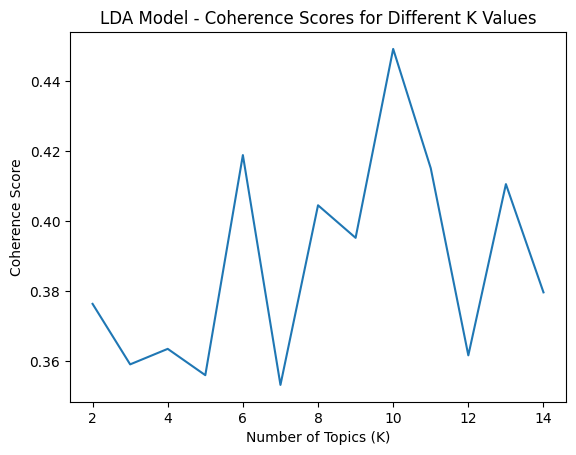

Topic #1: encryption, bbs, dos, devices, dog, expensive, check, sleep, fonts, installed


RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.

In [ ]:
import random
import openai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
import gensim
from gensim.models import CoherenceModel
from gensim import corpora

# Set your OpenAI API Key
openai.api_key = ''
# Load the 20 Newsgroups dataset and sample 2000 random posts
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = newsgroups.data

# Randomly sample 2000 posts
random.seed(42)
indices = random.sample(range(len(data)), 2000)
sampled_data = [data[i] for i in indices]

# Preprocess the data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf_matrix = vectorizer.fit_transform(sampled_data)

# Perform LDA (Latent Dirichlet Allocation)
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(tfidf_matrix)

# Tokenize the documents
def tokenize_documents(documents):
    return [doc.split() for doc in documents]

# Tokenized corpus (using a simple split for demonstration)
corpus = tokenize_documents(sampled_data)
dictionary = corpora.Dictionary(corpus)

# Create BoW (Bag of Words) corpus from the tokenized corpus
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

# Compute coherence score for LDA (using gensim)
def compute_coherence_score(model, corpus, dictionary, texts):
    # Get the top words for each topic
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
        topics.append(topic_words)

    # Create a coherence model using the topic words
    coherence_model = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, texts=texts, coherence='c_v')
    return coherence_model.get_coherence()

lda_coherence_score = compute_coherence_score(lda_model, bow_corpus, dictionary, corpus)
print("LDA Coherence Score (using Gensim): ", lda_coherence_score)

# Try different K values and compute coherence scores for each
k_values = range(2, 15)
coherence_scores = []

for k in k_values:
    lda_model = LatentDirichletAllocation(n_components=k, random_state=42)
    lda_model.fit(tfidf_matrix)
    coherence_scores.append(compute_coherence_score(lda_model, bow_corpus, dictionary, corpus))

# Plot the coherence scores
plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("LDA Model - Coherence Scores for Different K Values")
plt.show()

# Use OpenAI GPT to summarize the topics (Updated for API v1.0.0+)
def summarize_topic_with_gpt(topic_words):
    prompt = f"Summarize the following topic in a meaningful way:\n\n{', '.join(topic_words)}"

    # Use the updated API for OpenAI GPT (ChatCompletion)
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # You can replace with the desired GPT model
        messages=[{"role": "user", "content": prompt}],
        max_tokens=100,
        temperature=0.7
    )
    summary = response['choices'][0]['message']['content'].strip()
    return summary

# Get the top words for LDA topics and generate summaries using GPT
def get_lda_topics_and_summaries(model, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    topic_summaries = []

    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

        # Generate a summary for the topic using GPT
        summary = summarize_topic_with_gpt(top_words)
        print(f"Summary: {summary}\n")
        topic_summaries.append(summary)

    return topic_summaries

# Get the topic summaries
summaries = get_lda_topics_and_summaries(lda_model)

# Output summaries for each topic
for idx, summary in enumerate(summaries):
    print(f"Topic {idx + 1} Summary: {summary}\n")


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [3]:
import pandas as pd
import random
from sklearn.datasets import fetch_20newsgroups

# Load dataset and sample 2000 rows
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
sampled_data = random.sample(data.data, 2000)

# Convert to DataFrame
dataframe_3 = pd.DataFrame(sampled_data, columns=['text'])
print(dataframe_3.head())

                                                text
0  I am looking for a WIN31 driver (or set) for m...
1  \n: |>You might visit some congregations of Ch...
2  I would like to know the regular/international...
3  Version 1.3 of Xew widgets is available at\n\n...
4  \n\nYou are absolutely daft.  No flame require...


In [11]:
!pip install bertopic

In [1]:
!pip install openai==0.27.8

  Using cached openai-0.27.8-py3-none-any.whl.metadata (13 kB)
Using cached openai-0.27.8-py3-none-any.whl (73 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.71.0
    Uninstalling openai-1.71.0:
      Successfully uninstalled openai-1.71.0


In [1]:
!pip install 'numpy>=1.24'

In [1]:
!pip install --upgrade numpy --quiet
!pip uninstall -y bertopic
!pip install bertopic[all] --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is 

In [1]:
!pip install --upgrade jax jaxlib

In [1]:
!pip install bertopic[all]
!pip install --upgrade sentence-transformers
!pip install --upgrade jax jaxlib

In [2]:
!pip install --upgrade jax jaxlib
!pip install --upgrade tensorflow

In [1]:
!pip install openai==0.27.8

In [1]:
!pip install openai --upgrade

  Using cached openai-1.71.0-py3-none-any.whl.metadata (25 kB)
Using cached openai-1.71.0-py3-none-any.whl (598 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.27.8
    Uninstalling openai-0.27.8:
      Successfully uninstalled openai-0.27.8


In [1]:
!pip install --upgrade openai --quiet

In [1]:
from bertopic import BERTopic
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2") # This should work correctly now.

In [4]:
# Generate embeddings, accessing the 'text' column of the DataFrame
embeddings = embedding_model.encode(dataframe_3['text'].tolist(), show_progress_bar=True)

# Custom DBSCAN model
dbscan_model = DBSCAN(eps=0.3, min_samples=3, metric='cosine')

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [5]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=dbscan_model,
    vectorizer_model=CountVectorizer(ngram_range=(1, 2)),
    verbose=True
)

# 5. Fit the model with embeddings
topics, probs = topic_model.fit_transform(dataframe_3['text'], embeddings)

2025-04-08 04:47:56,621 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 04:48:26,396 - BERTopic - Dimensionality - Completed ✓
2025-04-08 04:48:26,398 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 04:48:26,550 - BERTopic - Cluster - Completed ✓
2025-04-08 04:48:26,557 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 04:48:30,929 - BERTopic - Representation - Completed ✓


In [6]:
print(topic_model.get_topic_info())

# Show top keywords per topic
for topic_num in topic_model.get_topics().keys():
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}")

   Topic  Count                                     Name  \
0      0   1954                          0_the_to_of_and   
1      1     46  1_idjits such_idjits_dancing with_as hi   

                                      Representation  \
0     [the, to, of, and, in, that, is, it, you, for]   
1  [idjits such, idjits, dancing with, as hi, dan...   

                                 Representative_Docs  
0  [(I have been having trouble posting this arti...  
1  [\n\t\t\t\t\tart\n, \nSuch as?, \nDancing With...  
Topic 0: [('the', np.float64(0.07945369624161208)), ('to', np.float64(0.048726336916815154)), ('of', np.float64(0.04427422386183116)), ('and', np.float64(0.04232517949275902)), ('in', np.float64(0.03300324889209374)), ('that', np.float64(0.031162150769801257)), ('is', np.float64(0.0301009119355157)), ('it', np.float64(0.027262889688202036)), ('you', np.float64(0.02214432077544433)), ('for', np.float64(0.021849239210348332))]
Topic 1: [('idjits such', np.float64(0.8509791955421342)

In [7]:
topic_info = topic_model.get_topic_info()
print(topic_info)

   Topic  Count                                     Name  \
0      0   1954                          0_the_to_of_and   
1      1     46  1_idjits such_idjits_dancing with_as hi   

                                      Representation  \
0     [the, to, of, and, in, that, is, it, you, for]   
1  [idjits such, idjits, dancing with, as hi, dan...   

                                 Representative_Docs  
0  [(I have been having trouble posting this arti...  
1  [\n\t\t\t\t\tart\n, \nSuch as?, \nDancing With...  


In [8]:
# Generate visualizations safely
topic_model.visualize_barchart(top_n_topics=5)

In [9]:
embeddings = embedding_model.encode(dataframe_3['text'].tolist(), show_progress_bar=True)


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [10]:
topic_model_default = BERTopic()
topics_default, _ = topic_model_default.fit_transform(dataframe_3['text'])

In [11]:
topic_model_default.visualize_barchart(top_n_topics=5)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

Overall, Modified BERTopic performs the best among the four topic modeling methods that we consider: LDA, LSA, BERTopic and Modified BERTopic.  LDA is a very effective probabilistic model with interpretable themes but cannot be applied to brief texts or semantic context.  LSA usually does not provide more cohesive and overlapping themes, however, it is quick and helpful as a dimensionality reduction tool.  It uses transformer-based embeddings, such as BERT, to generate robust, cohesive subjects with interactive visualizations, and the Modified BERTopic furthers the results with less topics and modified parameters like UMAP, to increase the coherence and sensitivity of the results.  Specifically, it is the most accurate and flexible of the four as it has superior power in the short organically occurring real world text data.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
I think assignment is good. But it is extremely hard.




'''